# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
d=pd.read_excel('GermanCredit.xlsx')
d.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [7]:
print(d.shape)
print(d.info())
print(d['Creditability'].value_counts())
print(d['DurationOfCreditInMonths'].value_counts())

(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Creditability               1000 non-null int64
CreditAmount                1000 non-null int64
DurationOfCreditInMonths    1000 non-null int64
dtypes: int64(3)
memory usage: 23.6 KB
None
1    700
0    300
Name: Creditability, dtype: int64
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: DurationOfCreditInMonths, dtype: int64


# 3. Plot Histogram for column 'CreditAmount'

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

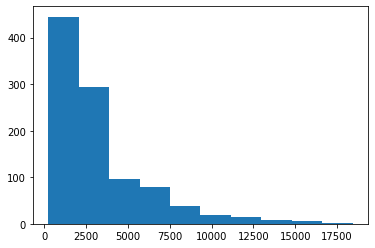

In [8]:
plt.hist(d['CreditAmount'])

# 3b. Create creditability dataframe

In [12]:
d0=d[d['Creditability']==0]
d1=d[d['Creditability']==1]

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [17]:
d11=pd.concat([d0,d1],axis=0)

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

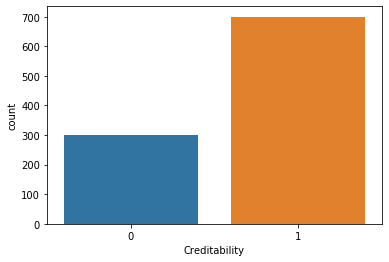

In [18]:
sns.countplot(d['Creditability'])

# 6. Prepare input data for the model

In [20]:
x=d.drop(['Creditability'],axis=1)
y=d['Creditability']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# 7. Fit logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]
y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]
print('pred: ',y_pred)
print('prob: ',y_prob)

pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
prob:  [0.7374263  0.76618019 0.7669794  0.77903096 0.72767485 0.68835693
 0.78578253 0.80096852 0.80359216 0.69334442 0.80560554 0.70003945
 0.77059545 0.56725442 0.62510441 0.76510953 0.72919345 0.69192554
 0.73051098 0.68708851 0.5969767  0.73415326 0.7668141  0.48943104
 0.74854437 0.69565432 0.72803082 0.61322181 0.4907783  0.79057403
 0.70890722 0.69386352 0.7042211  0.75022

# 8. Test accuracy calculation

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
print('Accuracy train:',accuracy_score(y_train,y_tpred))
print('Accuracy test:',accuracy_score(y_test,y_pred))
print('roc_auc train:',roc_auc_score(y_train,y_tprob))
print('roc_auc test:',roc_auc_score(y_test,y_prob))

Accuracy train: 0.7185714285714285
Accuracy test: 0.6666666666666666
roc_auc train: 0.630795
roc_auc test: 0.6397


# 9. Build a confusion matrix

In [30]:
print('train:',confusion_matrix(y_train,y_tpred))
print('test:',confusion_matrix(y_test,y_pred))

train: [[ 12 188]
 [  9 491]]
test: [[  5  95]
 [  5 195]]


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

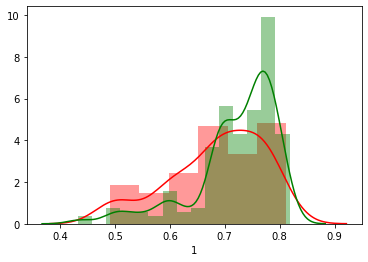

In [32]:
y_tt=pd.DataFrame([y_test.values,y_prob]).T
d0=y_tt[y_tt[0]==0.0]
d1=y_tt[y_tt[0]==1.0]
sns.distplot(d0[1],color='r')
sns.distplot(d1[1],color='g')

In [39]:
print(d0[0].value_counts())
print(d1[0].value_counts())

0.0    100
Name: 0, dtype: int64
1.0    200
Name: 0, dtype: int64
